# Descriptive (Spatial) Analytics

Analyze taxi demand patterns for the relevant one-year period and 
city (please check carefully which year your team has been allocated). 

Specifically show how these
patterns (start time, trip length, start and end location, price, average idle time between trips, and so 
on) for the given sample varies in different spatio-temporal resolution (i.e., census tract vs. varying
hexagon diameter and/or temporal bin sizes). 

Give possible reasons for the observed patterns.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
palette = "turbo"

In [ ]:
# df_chic = pd.read_csv("./data/datasets/df_chicago.csv")
# len(df_chic)

In [29]:
#import dataset
df = pd.read_csv("./data/datasets/df_chicago_hourly.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dayOfWeek             8760 non-null   object 
 1   isHoliday             8760 non-null   bool   
 2   season                8760 non-null   object 
 3   start_time_hourly     8760 non-null   int64  
 4   start_time_day        8760 non-null   int64  
 5   start_time_week       8760 non-null   int64  
 6   start_time_month      8760 non-null   int64  
 7   isRushhour            8760 non-null   bool   
 8   pressure              8760 non-null   float64
 9   humidity              8760 non-null   float64
 10  temperature_celsius   8760 non-null   float64
 11  wind_direction        8760 non-null   float64
 12  wind_speed            8760 non-null   float64
 13  description           8760 non-null   object 
 14  h3_hex_id_high_res    8760 non-null   object 
 15  h3_hex_id_medium_res 

In [19]:
df.describe()

,start_time_hourly,start_time_day,start_time_week,start_time_month,pressure,humidity,temperature_celsius,wind_direction,wind_speed,numOfTaxisHourly
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,15.720548,26.430137,6.526027,1016.567580,73.788299,9.941311,193.205594,3.066667,1024.397945
std,6.922582,8.796749,15.047769,3.448048,8.470378,17.403184,11.209318,100.241101,2.238570,692.240815
min,0.000000,1.000000,1.000000,1.000000,979.000000,17.000000,-17.920000,0.000000,0.000000,43.000000
25%,5.750000,8.000000,13.000000,4.000000,1011.000000,62.000000,0.800000,109.000000,1.000000,480.750000
50%,11.500000,16.000000,26.000000,7.000000,1016.000000,76.000000,10.361000,210.000000,3.000000,922.500000
75%,17.250000,23.000000,39.000000,10.000000,1022.000000,89.000000,19.423000,273.000000,4.000000,1384.000000
max,23.000000,31.000000,52.000000,12.000000,1047.000000,100.000000,35.330000,360.000000,18.000000,5310.000000


In [18]:
def create_boxplot(x,y, data):
    sns.boxplot(x=x,y=y,data=data,palette=palette,hue="dayOfWeek",hue_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    plt.title("Daily Fleet Usage Per Unique Hour & Weekday", fontsize=18)
    plt.xlabel("Starting Hour of Rental", fontsize=14, style='oblique')
    plt.ylabel("Number of rented bikes (per hour)", fontsize=14, style='oblique')
    plt.show()

## Start time

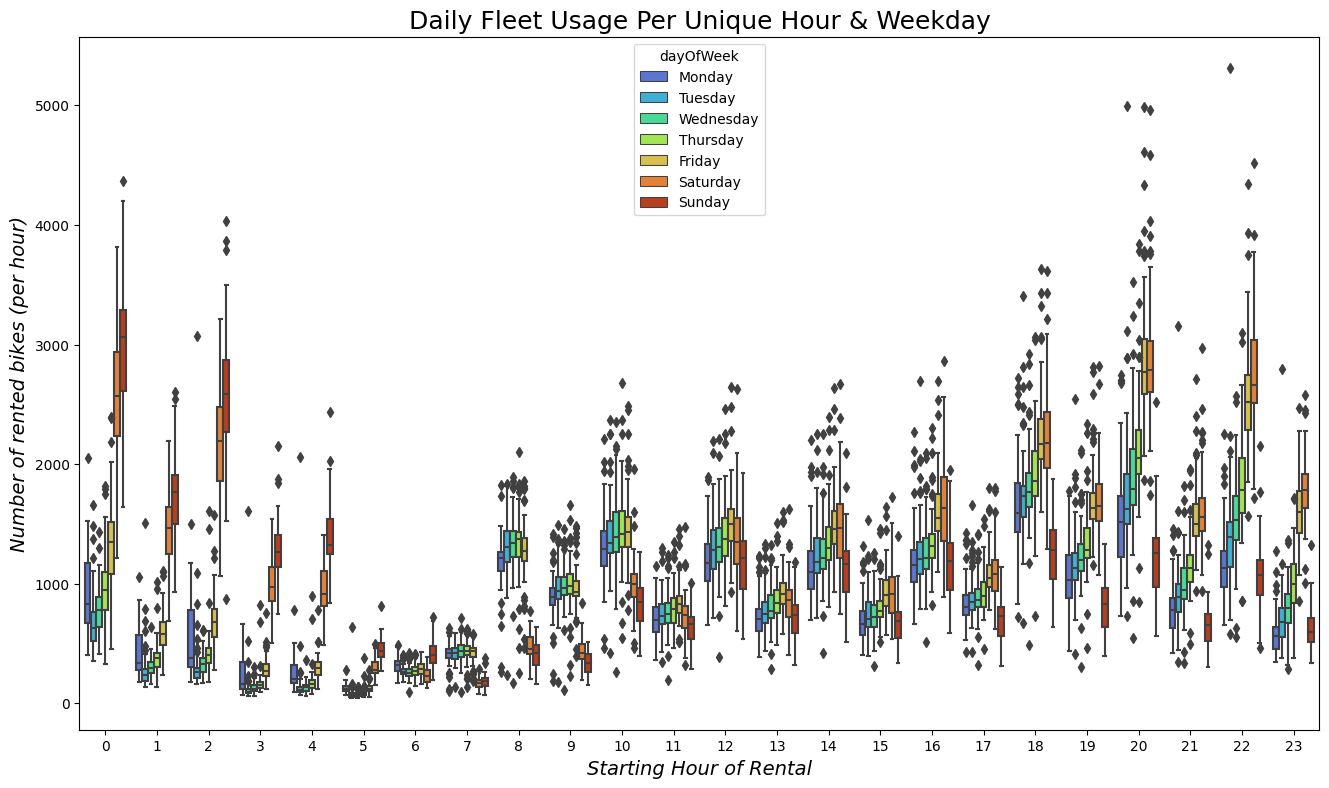

In [21]:
create_boxplot("start_time_hourly", "numOfTaxisHourly", df)

In [31]:
df.columns

Index(['dayOfWeek', 'isHoliday', 'season', 'start_time_hourly',
       'start_time_day', 'start_time_week', 'start_time_month', 'isRushhour',
       'pressure', 'humidity', 'temperature_celsius', 'wind_direction',
       'wind_speed', 'description', 'h3_hex_id_high_res',
       'h3_hex_id_medium_res', 'h3_hex_id_low_res', 'numOfTaxisHourly'],
      dtype='object')

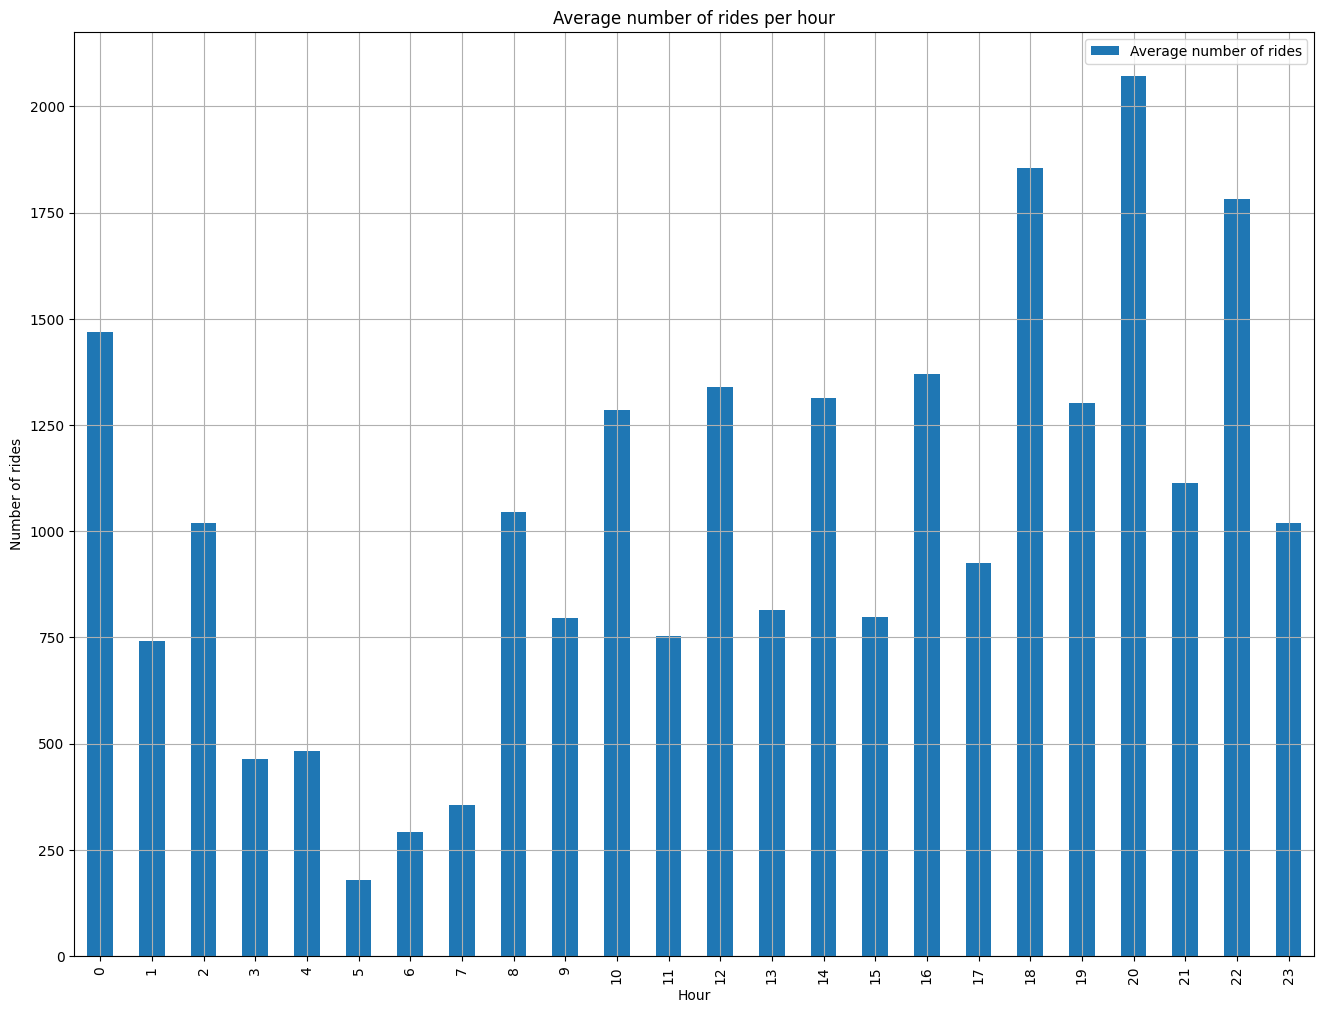

In [32]:
#because we average here, we need the dataset with 0 trips
grouped_hours = df[["start_time_hourly", "numOfTaxisHourly"]].groupby("start_time_hourly").mean()
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Average number of rides per hour")
plt.legend(["Average number of rides"])
plt.show()

In [41]:
tmp = df[(df["start_time_hourly"] == 20)]
tmp["numOfTaxisHourly"].sum()

756101

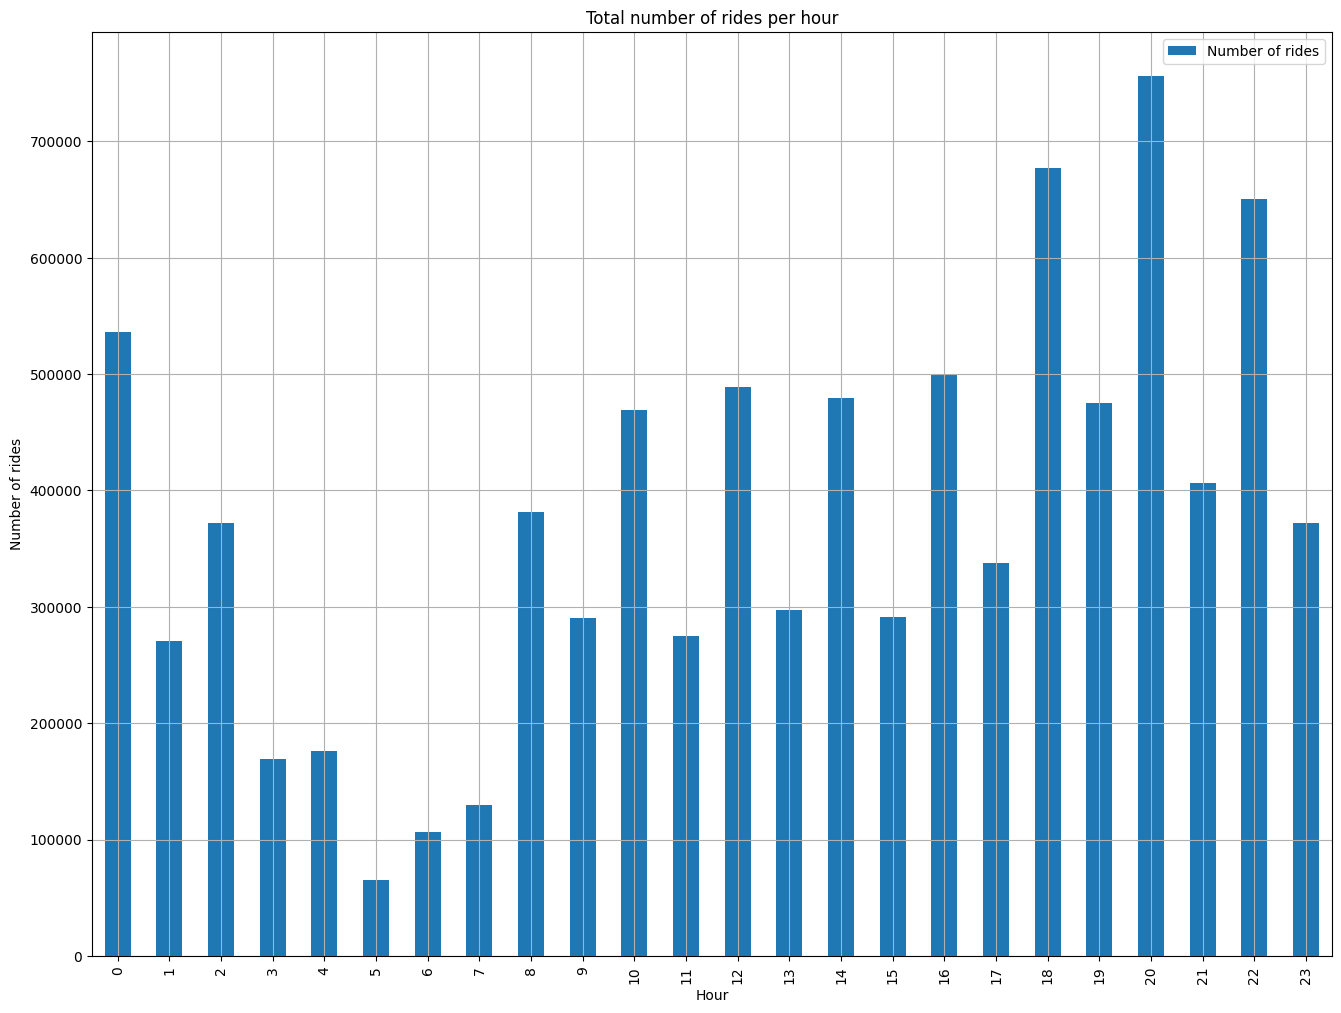

In [ ]:
grouped_hours = df[["start_time_hourly", "numOfTaxisHourly"]].groupby("start_time_hourly").sum() #count() wenn normaler datensatz mit allen einträgen
grouped_hours.plot(kind='bar', ylabel='Number of rides', xlabel='hour', figsize=(16,12), label='Num rides without 0', alpha=1)
plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of rides")
plt.title("Total number of rides per hour")
plt.legend(["Number of rides"])
plt.show()

### Census tract vs. varying hexagon diameter

#### Low hexagon diameter

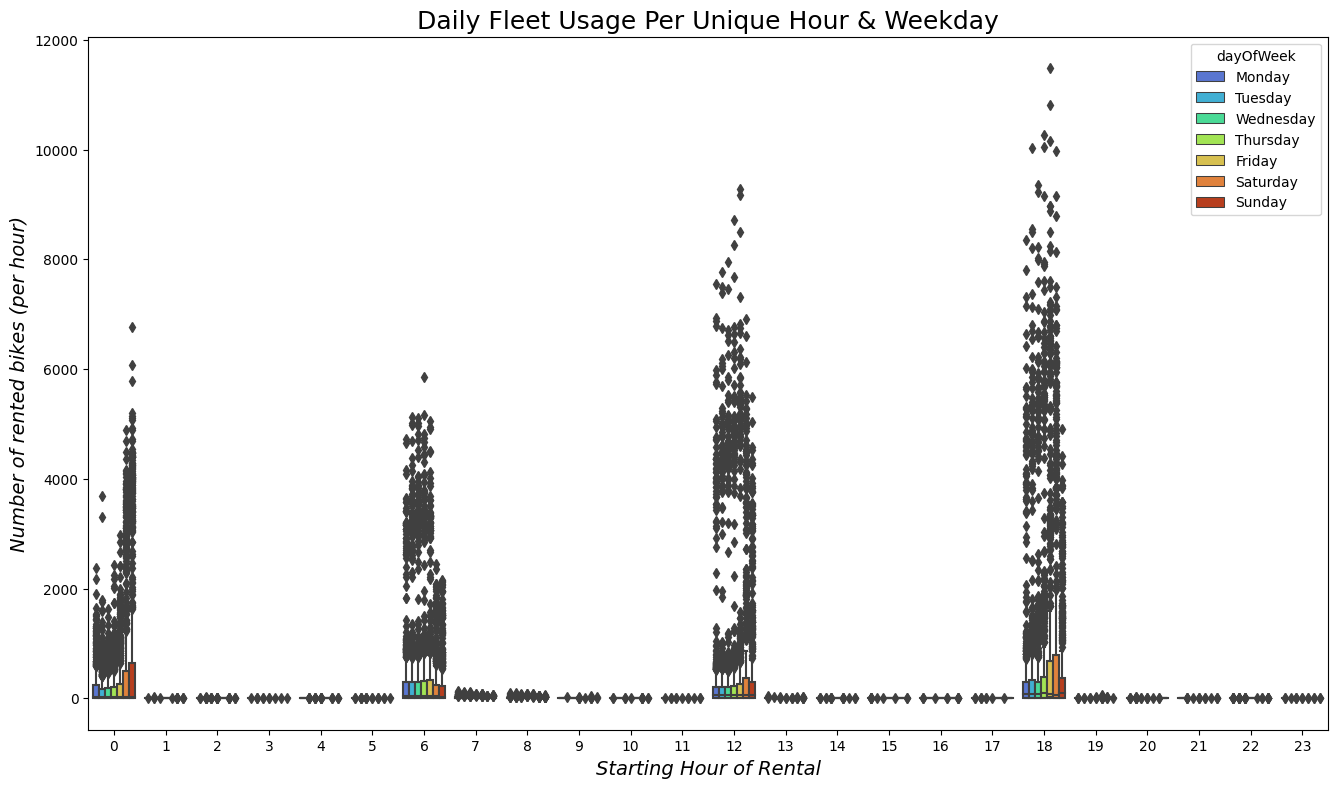

In [22]:
#import dataset
df = pd.read_csv("./data/datasets/df_6h_hexlow.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area",df)

#### Medium hexagon diameter

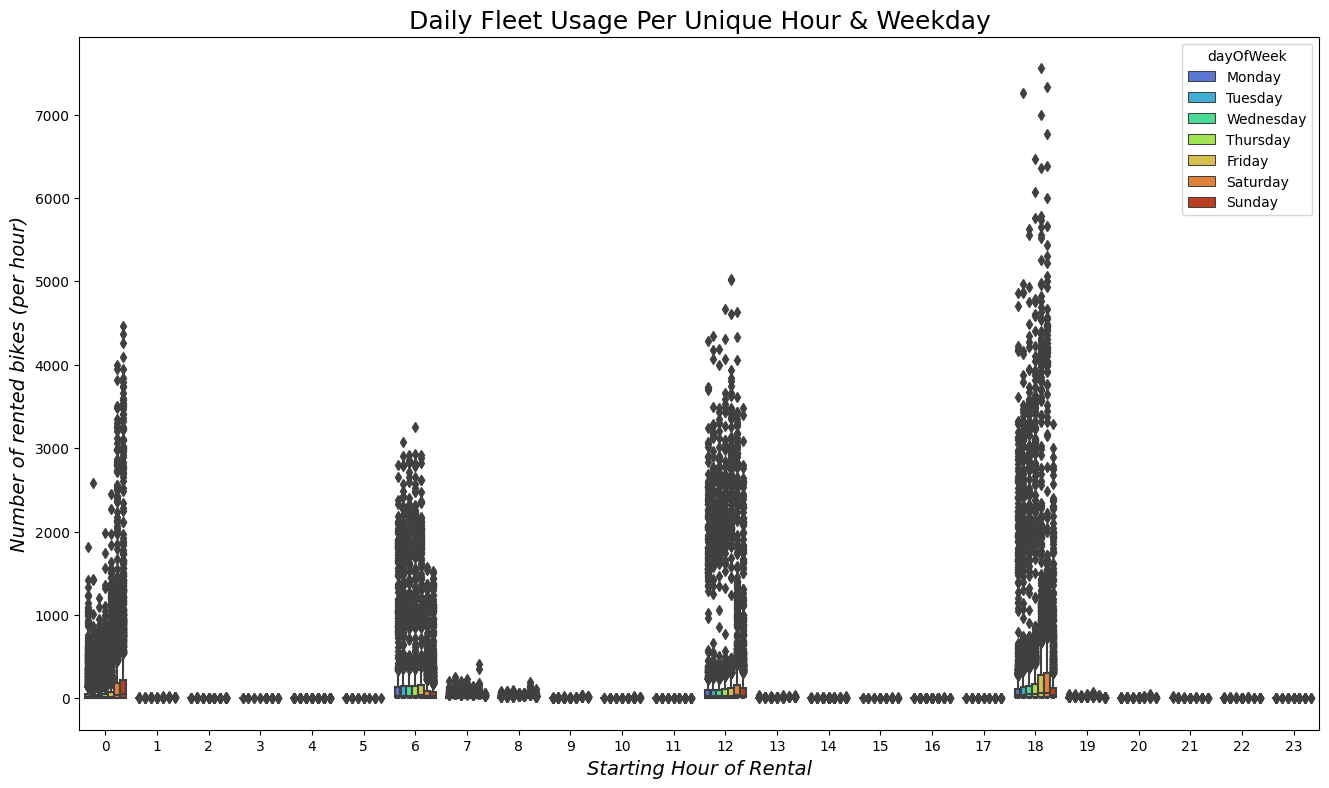

In [23]:
#import dataset
df = pd.read_csv("./data/datasets/df_6h_hexmed.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area", df)

#### High hexagon diameter

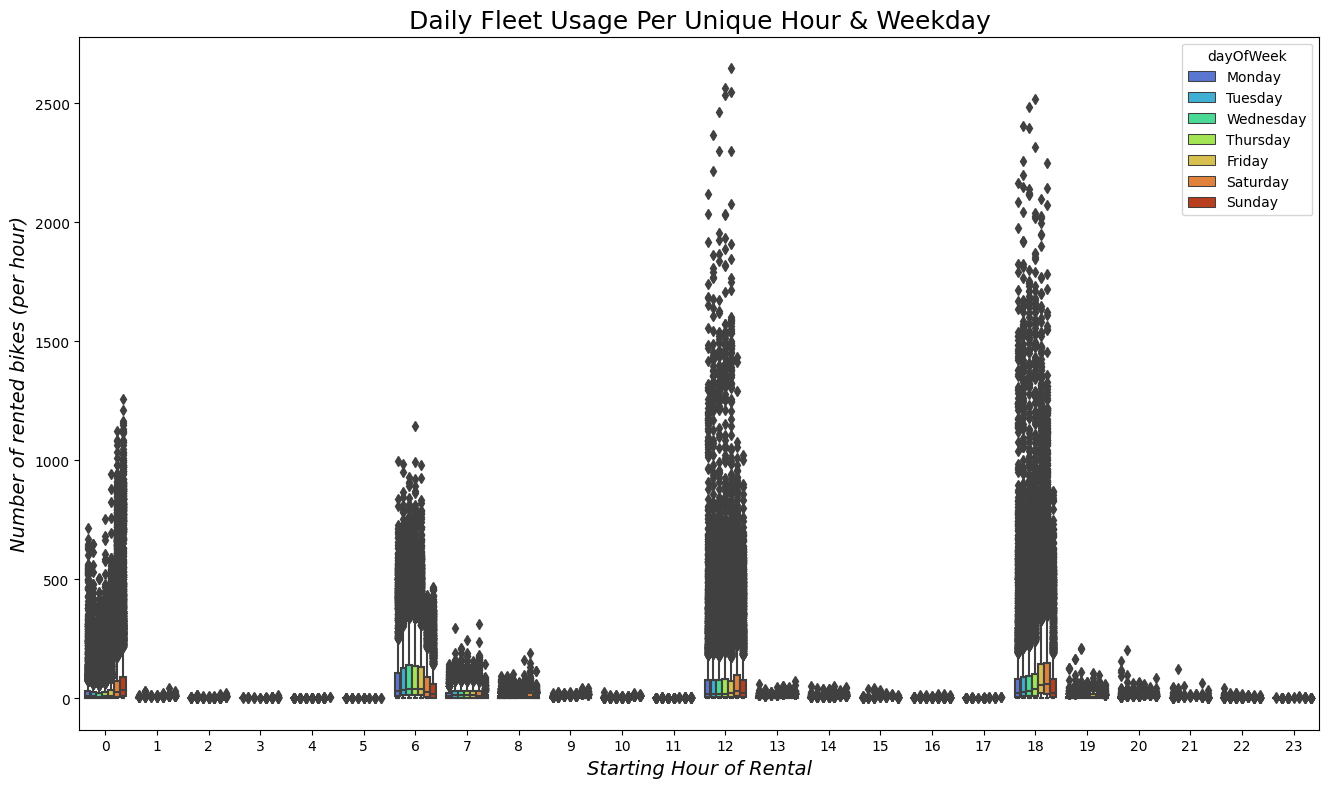

In [25]:
#import dataset
df = pd.read_csv("./data/datasets/df_6h_hexhig.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area", df)

### Census tract vs. diff temporal bin sizes

#### 2 Hour

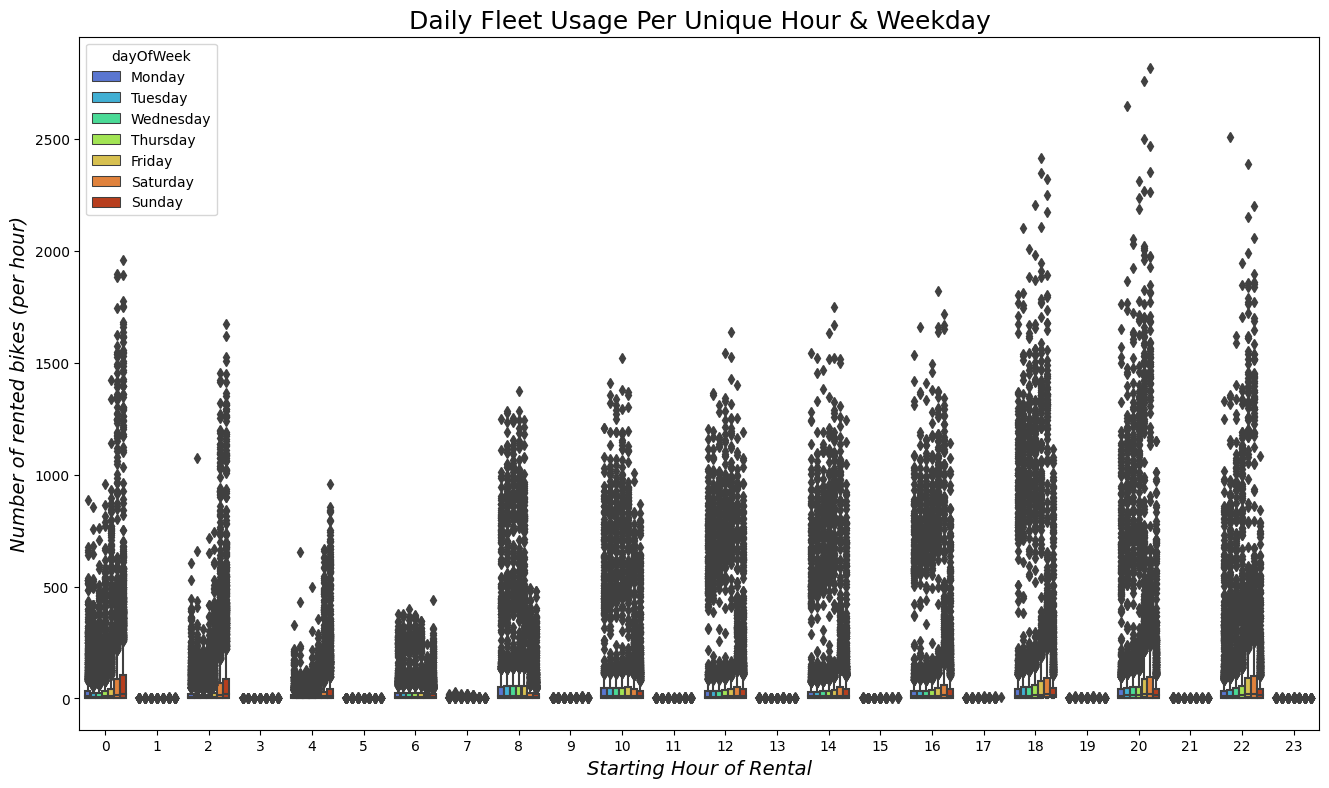

In [26]:
#import dataset
df = pd.read_csv("./data/datasets/df_2h_hexmed.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area", df)

#### 6 Hour

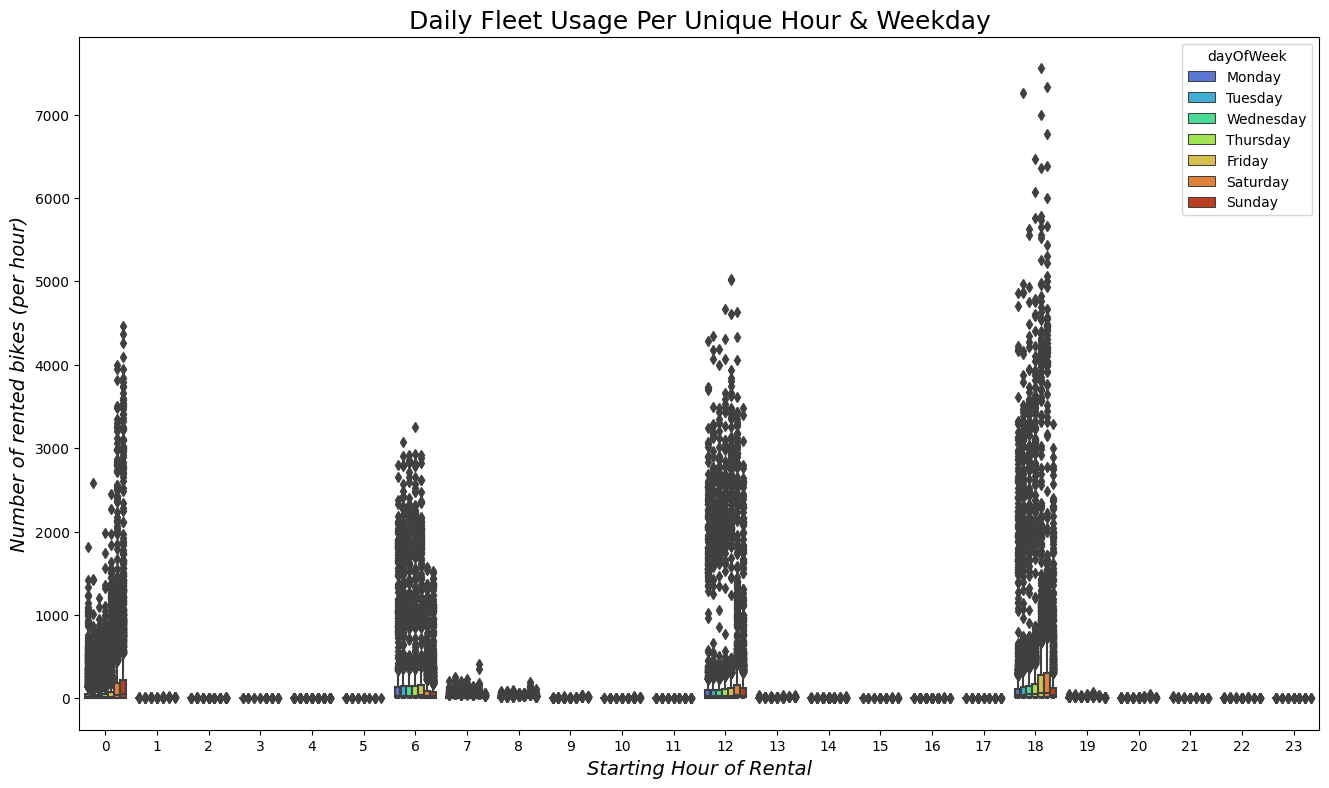

In [27]:
#import dataset
df = pd.read_csv("./data/datasets/df_6h_hexmed.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area", df)

#### 24 Hour

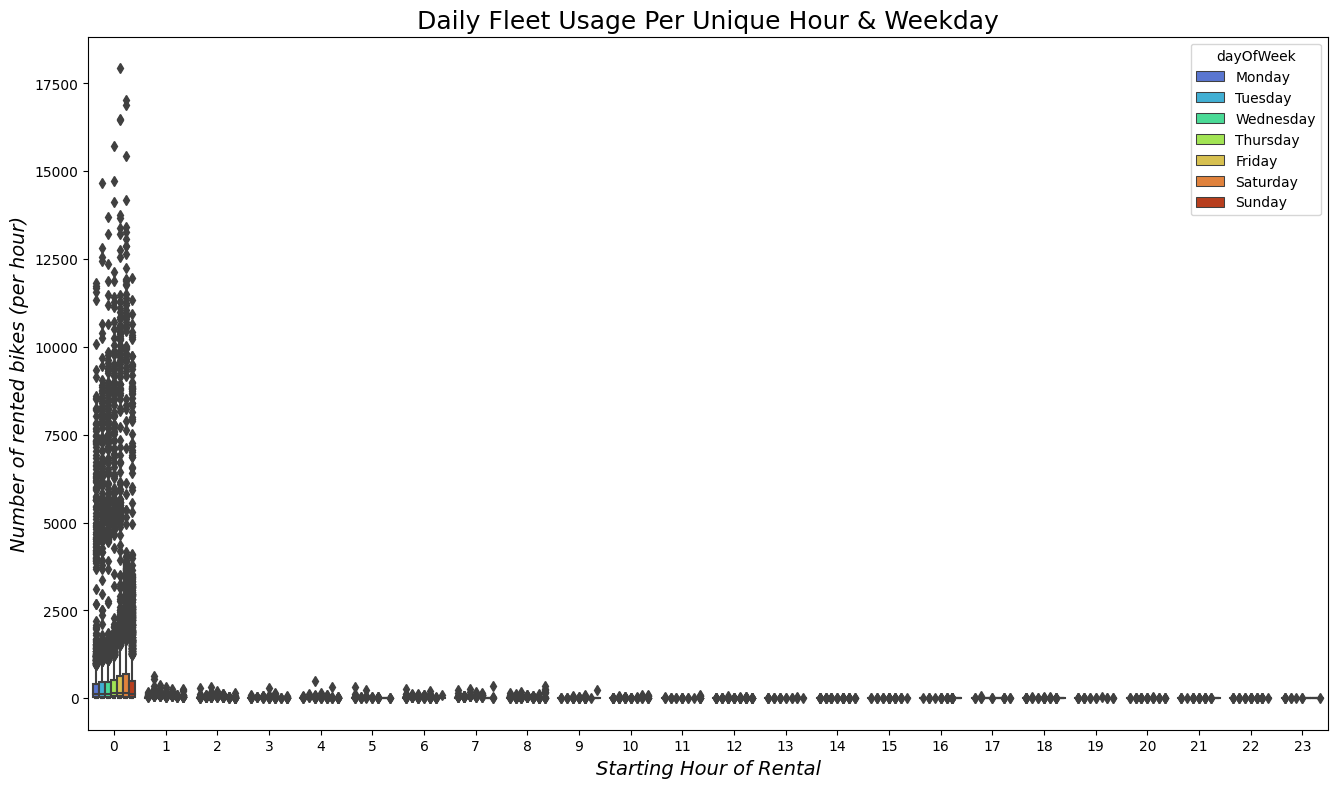

In [28]:
#import dataset
df = pd.read_csv("./data/datasets/df_24h_hexmed.csv")

create_boxplot("start_time_hourly", "numOfTaxis_area", df)

## More features